In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import timeit
from IPython.display import clear_output

# $$\textbf{Ising Model 2D} $$

In [2]:
def initialize_lattice(size):
    #s = np.ones((size, size), int)  # All spins initially set to 1 (up)
    s = np.where(np.random.rand(size, size) < 0.5, 1, -1)
    return s

def deltaU(lattice, i, j, size):
    top    = lattice[i - 1, j] if i > 0 else lattice[size - 1, j]
    bottom = lattice[(i + 1) % size, j]
    left   = lattice[i, j - 1] if j > 0 else lattice[i, size - 1]
    right  = lattice[i, (j + 1) % size]
    return 2 * lattice[i, j] * (top + bottom + left + right)

def run_simulation(lattice, T, size, total_steps, steps_per_frame):
    for step in range(total_steps):
        i, j = np.random.randint(0, size), np.random.randint(0, size)
        Ediff = deltaU(lattice, i, j, size)
        if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
            lattice[i, j] *= -1  # Flip the spin

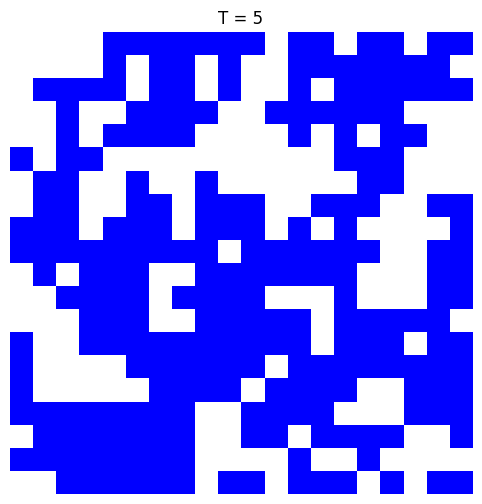

In [9]:
T = 5
size = 20
lattice = np.ones((size, size), int)   # Initialize the lattice with all spins up
run_simulation(lattice, T, size=size, total_steps=100 * size**2, steps_per_frame=size**2)
cmap = mcolors.ListedColormap(["white", "blue"])

fig, ax=plt.subplots(figsize=(12, 6))
ax.imshow(lattice, cmap=cmap, norm=mcolors.Normalize(vmin=-1, vmax=1))
ax.set_title(f"T = {T}")
ax.axis('off')
plt.show()

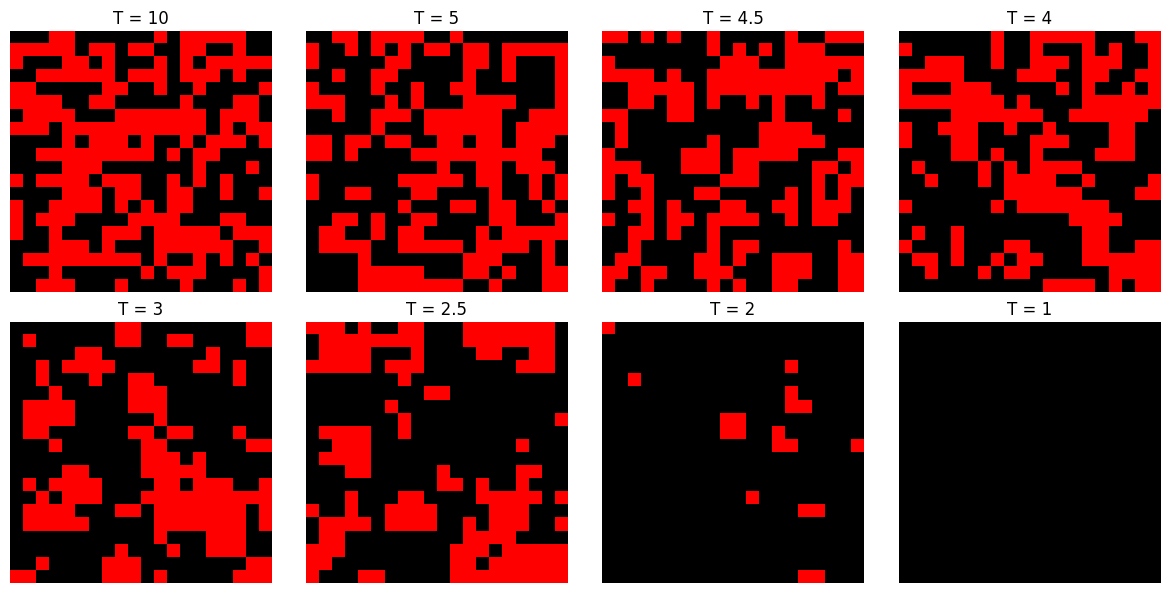

In [10]:
T_v = [10, 5, 4.5, 4, 3, 2.5, 2, 1]   # Temperatures
size = 20                       # Lattice size
cmap = mcolors.ListedColormap(["red", "black"])

fig, axes = plt.subplots(2, len(T_v)//2, figsize=(12, 6))
for idx, T in enumerate(T_v):
    lattice = np.ones((size, size), int)   # Initialize the lattice with all spins up
    run_simulation(lattice, T, size=size, total_steps=100 * size**2, steps_per_frame=size**2)

    row = idx // (len(T_v) // 2)  # Determine the row index
    col = idx % (len(T_v) // 2)  # Determine the column index
    ax = axes[row, col]          # Access the appropriate subplot
    im = ax.imshow(lattice, cmap=cmap, norm=mcolors.Normalize(vmin=-1, vmax=1))
    ax.set_title(f"T = {T}")
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

Modify the ising program to compute the average energy of the system over all iterations.                                
To do this, first add code to the initialise subroutine compute the initial energy of the lattice; then,                      
whenever a dipole is flipped, change the energy variable by the appropriate amount.                                     
When computing the average energy, be sure to average over all iterations, not just those iterations in which a dipole is actually flipped (why?).                                
Run the program for a 5 x 5 lattice for T values from 4 down to l in reasonably small intervals, then plot the average energy as a function of T.                                                                                                     
Also plot the heat capacity. Use at least 1000 iterations per dipole for each run, preferably more.                                                      
 If your computer is fast enough, repeat for a 10x 10 lattice and for a 20 x 20 lattice.                                    
 Discuss the results. (Hint: Rather than starting over at each temperature with a random initial state,                      
 you can save time by starting with the final state generated at the previous, nearby temperature.                          
 For the larger lattices you may wish to save time by considering only a smaller temperature interval, perhaps from 3 down to 1.5.)

In [11]:
def initialize(size):
    s = np.where(np.random.rand(size, size) < 0.5, 1, -1)    # Initialize lattice with random spins (+1 or -1)
    energy = 0                                               # Initial energy with periodic boundary conditions
    for i in range(size):
        for j in range(size):
            right = s[i, (j + 1) % size]                     # Right neighbor (wrap around with modulus)
            bottom = s[(i + 1) % size, j]                    # Bottom neighbor (wrap around with modulus)
            energy -= s[i, j] * (right + bottom)             # Sum up interactions (i, j) with neighbors to get energy
    return s, energy

def deltaU(lattice, i, j, size):
    left   = lattice[i - 1 if i > 0 else size - 1, j]
    right  = lattice[(i + 1) % size, j]
    top    = lattice[i, j - 1 if j > 0 else size - 1]
    bottom = lattice[i, (j + 1) % size]
    return 2.0 * lattice[i, j] * (left + right + top + bottom)

def ising_model(size, iMax, temperature_range):
    s, energy = initialize(size)
    temperatures, avg_energies, heat_capacities = [],[],[]
    for T in temperature_range:
        cumulativeU, cumulativeU2 = 0,0
        for _ in range(1, iMax * size**2):
            i, j = np.random.randint(0, size), np.random.randint(0, size)
            Ediff = deltaU(s, i, j, size)
            if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
                s[i, j] = -s[i, j]  # Flip the spin
                energy += Ediff     # Update total energy
                
            cumulativeU += energy
            cumulativeU2 += energy**2
            
        averageU = cumulativeU / (iMax * size**2)
        averageU2 = cumulativeU2 / (iMax * size**2)
        heatcap = (averageU2 - averageU**2) / T**2
        temperatures.append(T)
        avg_energies.append(averageU)
        heat_capacities.append(heatcap/size**2)
        
    return temperatures, avg_energies, heat_capacities

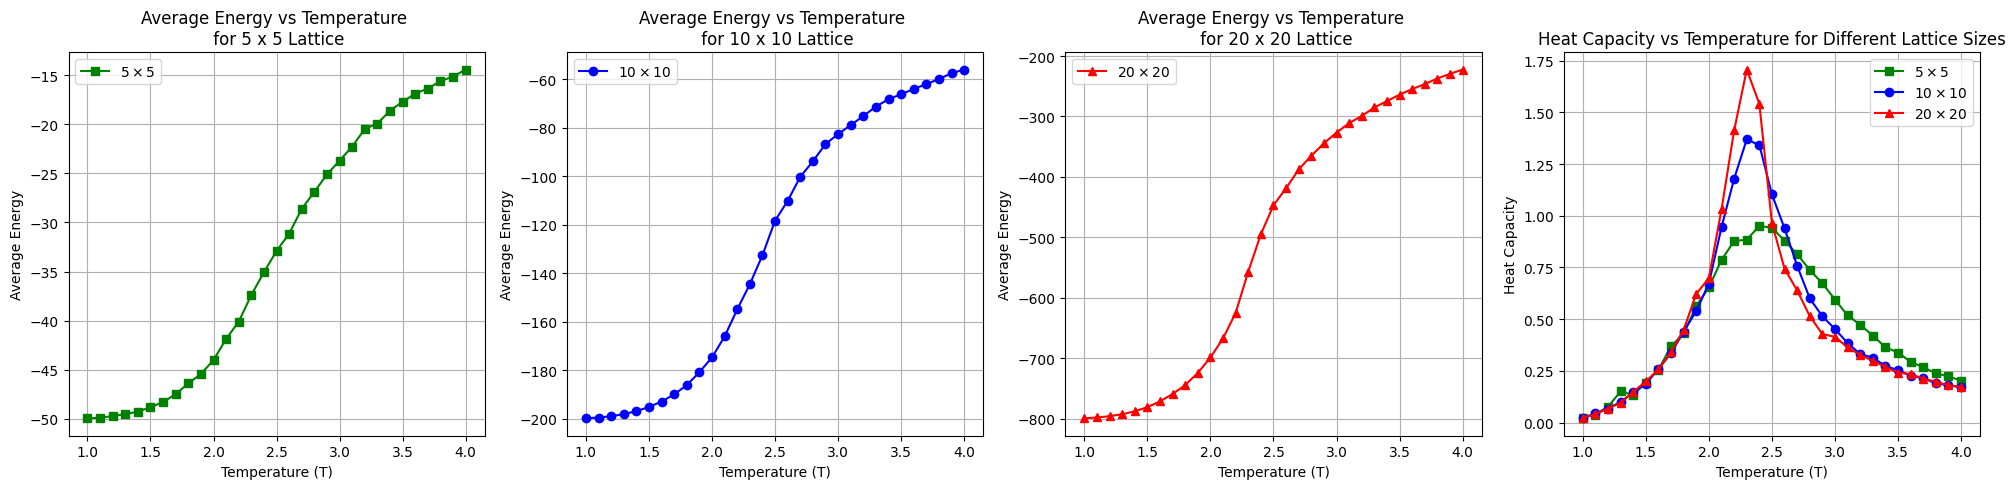

In [12]:
S = [5, 10, 20]                               # Lattice size 
M = ["s", "o", "^"]
c = ['g', 'b', 'r']
iMax = 10000                                  # Number of iterations per dipole
temperature_range = np.arange(4, 0.99, -0.1)  # Temperature range from 4 down to 1

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, len(S)+1)  
for i, size in enumerate(S): 
    temperatures, avg_energies, heat_capacities = ising_model(size, iMax, temperature_range)

    ax1 = fig.add_subplot(gs[0, i])
    ax1.plot(temperatures, avg_energies, marker=M[i], color=c[i], label=f"${size} \\times {size}$")
    ax1.set_xlabel("Temperature (T)")
    ax1.set_ylabel("Average Energy")
    ax1.set_title(f"Average Energy vs Temperature \n for {size} x {size} Lattice")
    ax1.grid()
    ax1.legend()
    
ax2 = fig.add_subplot(gs[0, -1])  
for i, size in enumerate(S):
    temperatures, avg_energies, heat_capacities = ising_model(size, iMax, temperature_range)
    ax2.plot(temperatures, heat_capacities, marker=M[i], color=c[i], label=f"${size} \\times {size}$")
ax2.set_xlabel("Temperature (T)")
ax2.set_ylabel("Heat Capacity")
ax2.set_title("Heat Capacity vs Temperature for Different Lattice Sizes")
ax2.grid()
ax2.legend()
plt.tight_layout()
plt.show()

Modify the ising program to compute the total magnetisation (that is, the sum of all the s values) for each iteration,    
and to tally how often each possible magnetisation value occurs during a run, plotting the results as a histogram.          
Run the program for a 5 x 5 lattice at a variety of temperatures, and discuss the results.                                      
Sketch a graph of the most likely magnetisation value as a function of temperature.                                          
If your computer is fast enough, repeat for a 10 x 10 lattice.

In [13]:
def initialize(size):
    s = np.random.choice([-1, 1], (size, size))
    mag = np.sum(s)
    return s, mag

def deltaU(lattice, i, j, size):
    left   = lattice[i - 1 if i > 0 else size - 1, j]
    right  = lattice[(i + 1) % size, j]
    top    = lattice[i, j - 1 if j > 0 else size - 1]
    bottom = lattice[i, (j + 1) % size]
    return 2.0 * lattice[i, j] * (left + right + top + bottom)

def simulate(s, T, size, iterations):
    mag = np.sum(s)  
    mhist = { i:0 for i in range(-size**2, size**2 + 1, 2) }  
    for _ in range(iterations): #
        i, j = np.random.randint(0, size, 2)
        mag -= s[i, j]
        Ediff = deltaU(s, i, j, size)
        if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
            s[i, j] *= -1
        mag += s[i, j]        
        mhist[mag] += 1    
    return mhist, s

def draw_histogram(mhist, sizesq):
    hist_max = max(mhist.values())  # Find maximum for normalization
    x_values = list(mhist.keys())
    y_values = [count / hist_max for count in mhist.values()]  # Normalize by histmax
    return x_values, y_values

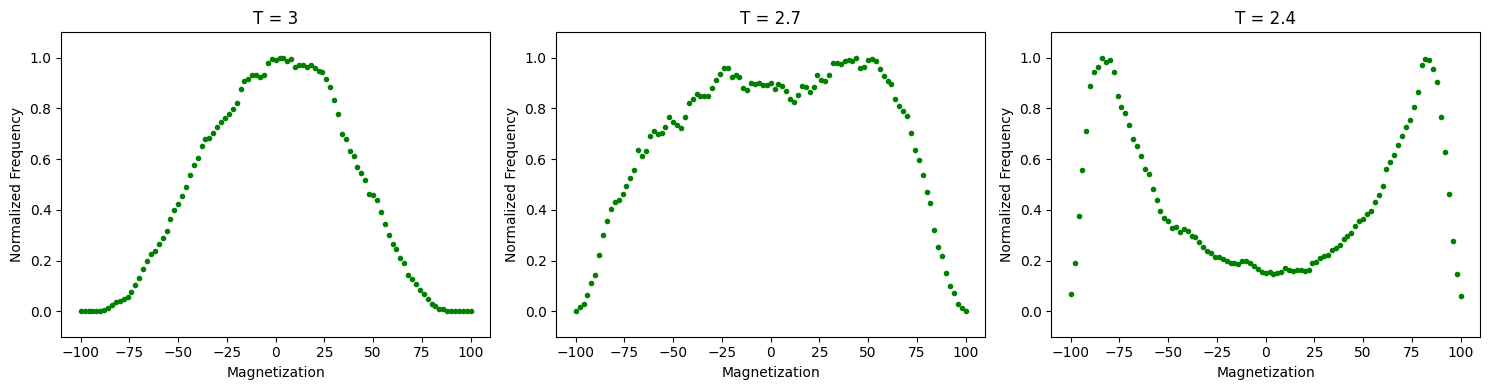

In [17]:
size = 10
T_val = [3, 2.7, 2.4]
iterations = 10000 * size**2

lattice, mag = initialize(size)

fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, len(T_val))

for i,T in enumerate(T_val):
    mhist, final_lattice = simulate(lattice, T, size, iterations)
    x_values, y_values = draw_histogram(mhist, size)
    ax = fig.add_subplot(gs[0, i])
    ax.plot(x_values, y_values, 'g.')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlabel("Magnetization")
    ax.set_ylabel("Normalized Frequency")
    ax.set_title(f'T = {T}')
plt.tight_layout()
plt.show()

To quantify the clustering of alignments within an Ising magnet, we define a quantity called the **correlation function**, $c(r)$.                                                                                                                 
Take any two dipoles i and j, separated by a distance r, and compute the product of their states: $s_is_j$.             
This product is 1 if the dipoles are parallel and -1 if the dipoles are antiparallel.                            
Now average this quantity over all pairs that are separated by a fixed distance r,                                        
to obtain a measure of the tendency of dipoles to be "correlated" over this distance.                                                                              
Finally, to remove the effect of any overall magnetisation of the system, subtract off the square of the average $s$.      
Written as an equation, then, the correlation function is                                                                           
$ \qquad\qquad c(r)=\overline{s_is_j} - \overline{s_i}^2$                                                                                          
where it is understood that the first term averages over all pairs at the fixed distance r.                                      
Technically, the averages should also be taken over all possible states of the system, but don't do this yet.

(a) Add a routine to the ising program to compute the correlation function for the current state of the lattice,         
averaging over all pairs separated either vertically or horizontally (but not diagonally) by r units of distance,           
where r varies from 1 to half the lattice size. Have the program execute this routine periodically and plot the results as a bar graph.

(b) Run this program at a variety of temperatures, above, below, and near the critical point.                                
Use a lattice size of at least 20, preferably larger (especially near the critical point).                                   
Describe the behaviour of the correlation function at each temperature.

(c) Now add code to compute the average correlation function over the duration of a run.                                    
(However, it's best to let the system "equilibrate" to a typical state before you begin accumulating averages.)                 
The correlation length is defined as the distance over which the correlation function decreases by a factor of e.            
Estimate the correlation length at each temperature, and plot graph of the correlation length vs.

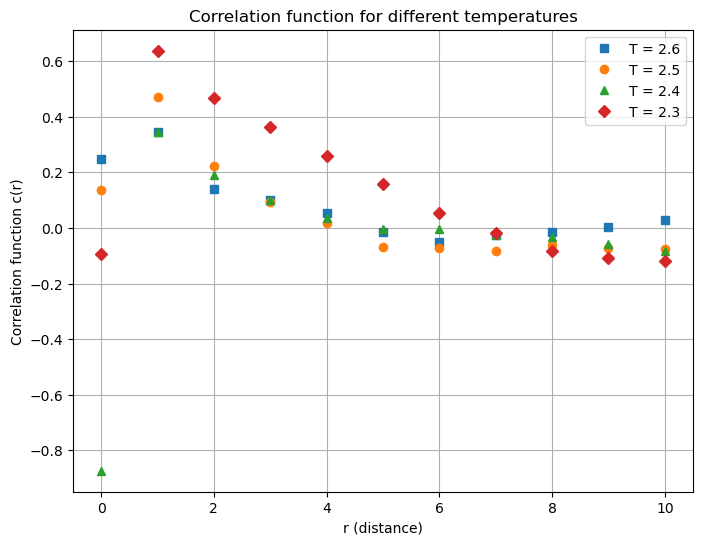

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import math

def initialize_lattice(size, prob=0.5):
    """ Initialize lattice with spins. """
    return np.where(np.random.rand(size, size) < prob, 1, -1)

def deltaU(lattice, i, j, size):
    """ Compute the energy difference for flipping a spin. """
    top    = lattice[i - 1, j] if i > 0 else lattice[size - 1, j]
    bottom = lattice[(i + 1) % size, j]
    left   = lattice[i, j - 1] if j > 0 else lattice[i, size - 1]
    right  = lattice[i, (j + 1) % size]
    return 2 * lattice[i, j] * (top + bottom + left + right)

def compute_corr(lattice, size):
    """ Compute the correlation function c(r). """
    cc = np.zeros(size // 2 + 1)
    # Calculate average spin (mean magnetization)
    ssum = np.sum(lattice)
    savsquared = (ssum / (size ** 2)) ** 2
    cc[0] = (np.sum(lattice) / size**2) - savsquared  # c(0)

    # Compute correlation function for distances r = 1 to size//2
    for r in range(1, size // 2 + 1):
        csum = 0
        for i in range(size):
            for j in range(size):
                right = (j + r) % size
                down = (i + r) % size
                csum += lattice[i, j] * (lattice[i, right] + lattice[down, j])
        cofr = csum / (2 * size**2) - savsquared
        cc[r] = cofr
    return cc

def run_simulation(lattice, T, size, passes, steps_per_pass):
    """ Run the Ising simulation and return correlation function. """
    for pass_num in range(passes + 40):
        for _ in range(steps_per_pass):
            i, j = np.random.randint(0, size), np.random.randint(0, size)
            Ediff = deltaU(lattice, i, j, size)
            if Ediff <= 0 or np.random.rand() < math.exp(-Ediff / T):
                lattice[i, j] *= -1  # Flip the spin
        if pass_num >= 40:  # Start collecting correlation function after equilibration
            cc = compute_corr(lattice, size)  
    return cc

# Simulation parameters
size = 20
T_values = [2.6, 2.5, 2.4, 2.3]
passes = 100
steps_per_pass = 5 * size ** 2
M = ['s', 'o', '^', 'D']

plt.figure(figsize=(8, 6))

# Run simulation and plot correlation functions
for i, T in enumerate(T_values):
    lattice = initialize_lattice(size, prob=0.5 if T > 2.27 else 0.2)  # Adjust initial magnetization based on T
    cc = run_simulation(lattice, T, size, passes, steps_per_pass)
    plt.plot(np.arange(0, size // 2 + 1), cc, M[i], label=f'T = {T}')

plt.xlabel('r (distance)')
plt.ylabel('Correlation function c(r)')
plt.legend()
plt.title('Correlation function for different temperatures')
plt.grid(True)
plt.show()


C:\Users\SOUVIK CHAKRABORTY\AppData\Local\Temp\ipykernel_26300\174331383.py:16: RuntimeWarning: invalid value encountered in log
  plt.semilogy(np.arange(1, size // 2 + 1), np.log(cc[1:]), M[i], label=f'T = {T}')  # Use log scale for y-axis
D:\Programs\Python\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


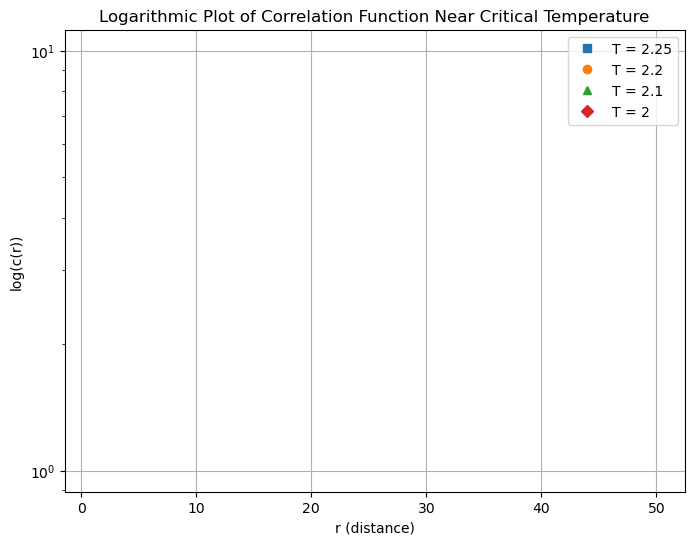

In [139]:
# Simulation parameters for different temperatures near critical temperature
size = 100  # Adjust lattice size for T near critical temperature
T_values = [2.25, 2.2, 2.1, 2]  # Temperatures around critical temperature
passes = 200  # More passes for better averaging
steps_per_pass = 5 * size ** 2
M = ['s', 'o', '^', 'D']

plt.figure(figsize=(8, 6))

# Run simulation and plot correlation functions
for i, T in enumerate(T_values):
    lattice = initialize_lattice(size, prob=0.2 if T < 2.27 else 0.5)  # Adjust initial magnetization based on T
    cc = run_simulation(lattice, T, size, passes, steps_per_pass)
    
    # Plot on logarithmic scale (log of correlation function vs r)
    plt.semilogy(np.arange(1, size // 2 + 1), np.log(cc[1:]), M[i], label=f'T = {T}')  # Use log scale for y-axis

plt.xlabel('r (distance)')
plt.ylabel('log(c(r))')
plt.legend()
plt.title('Logarithmic Plot of Correlation Function Near Critical Temperature')
plt.grid(True)
plt.show()


# $$\textbf{Ising Model 1D} $$

Modify the ising program to simulate a one-dimensional Ising model.   
a. For a lattice size of 100, observe the sequence of states generated at various temperatures and discuss the results.   
$\quad$According to the exact solution (for an infinite lattice), we expect this system to magnetise only as the temperature goes to zero;                                                                                                                   
$\quad$is the behaviour of your program consistent with this prediction? How does the typical cluster size depend on temperature?   
b. Modify your program to compute the average energy as in Problem 8.27.                                                   
$\quad$Plot the energy and heat capacity vs. temperature and compare to the exact result for an infinite lattice.   
c. Modify your program to compute the magnetisation as in Problem 8.28.    
$\quad$Determine the most likely magnetisation for various temperatures and sketch a graph of this quantity. Discuss.

In [70]:
def initialize_1D(size):
    s = np.where(np.random.rand(size) < 0.5, 1, -1)                 # Randomly assign spins of +1 or -1
    energy = -sum(float(s[i]) * s[(i + 1) % size] for i in range(size))  # Initial energy as float
    return s, energy

def deltaU_1D(lattice, i, size):
    left  = lattice[i - 1] if i > 0 else lattice[size - 1]
    right = lattice[(i + 1) % size]
    return 2.0 * lattice[i] * (left + right)  # Ensure the result is in floating-point format

def ising_model_1D(size, iMax, temperature_range):
    s, energy = initialize_1D(size)
    temperatures, avg_energies, heat_capacities = [], [], []
    for T in temperature_range:
        cumulativeU, cumulativeU2 = 0.0, 0.0  # Initialize as floats
        for _ in range(iMax * size):  # Number of iterations
            i = np.random.randint(0, size)
            Ediff = deltaU_1D(s, i, size)
            if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
                s[i] = -s[i]  # Flip the spin
                energy += Ediff  # Update total energy as float           
            cumulativeU += energy
            cumulativeU2 += energy**2  # Ensure energy is float to avoid overflow
        averageU = cumulativeU / (iMax * size)
        averageU2 = cumulativeU2 / (iMax * size)
        heatcap = (averageU2 - averageU**2) / T**2
        temperatures.append(T)
        avg_energies.append(averageU / size)
        heat_capacities.append(heatcap / size)
    return temperatures, avg_energies, heat_capacities

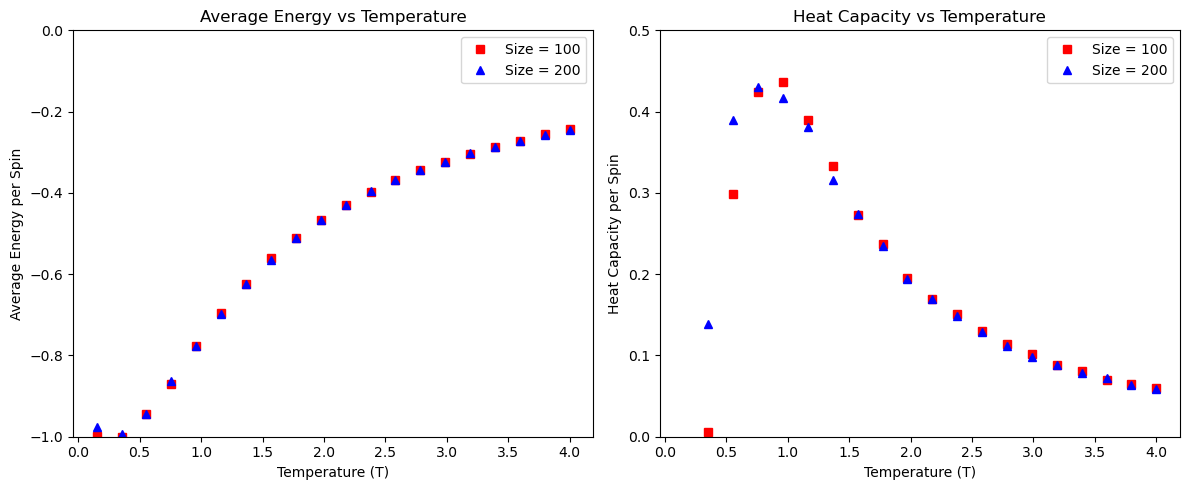

In [71]:
iMax = 5000                                   # Number of iterations per site
temperature_range = np.linspace(0.15, 4, 20)  # Temperature range

plt.figure(figsize=(12, 5))
m = ['rs', 'b^']
for i,size in enumerate([100, 200]):
    temperatures, avg_energies, heat_capacities = ising_model_1D(size, iMax, temperature_range)    
    plt.subplot(1, 2, 1)
    plt.plot(temperatures, avg_energies, m[i], label=f'Size = {size}')
    plt.xlabel("Temperature (T)")
    plt.ylabel("Average Energy per Spin")
    plt.title("Average Energy vs Temperature")
    plt.legend()
    plt.ylim([-1, 0])
    plt.subplot(1, 2, 2)
    plt.plot(temperatures, heat_capacities, m[i], label=f'Size = {size}')
    plt.xlabel("Temperature (T)")
    plt.ylabel("Heat Capacity per Spin")
    plt.title("Heat Capacity vs Temperature")
    plt.legend()
    plt.ylim([0, 0.5])

plt.tight_layout()
plt.show()

In [79]:
def initialize_1D(size):
    s = np.random.choice([-1, 1], size)  # 1D lattice with spins ±1
    mag = np.sum(s)                      # Initial magnetization
    return s, mag

def deltaU_1D(lattice, i, size):
    left = lattice[i - 1] if i > 0 else lattice[size - 1]
    right = lattice[(i + 1) % size]
    return 2.0 * lattice[i] * (left + right)              # Energy difference for flipping spin

def simulate_1D(s, T, size, iterations):
    mag = np.sum(s)
    mhist = {i: 0 for i in range(-size, size + 1, 1)}  # Magnetization histogram
    for _ in range(iterations):
        i = np.random.randint(0, size)
        mag -= s[i]                                    # Remove current spin contribution
        Ediff = deltaU_1D(s, i, size)
        if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
            s[i] *= -1                                 # Flip spin
        mag += s[i]                                    # Update magnetization
        mhist[mag] += 1                                # Track magnetization occurrences
    return mhist, s

def draw_histogram(mhist, size):
    hist_max = max(mhist.values())                             # Normalize by max count
    x_values = list(mhist.keys())
    y_values = [count / hist_max for count in mhist.values()]  # Normalized frequencies
    return x_values, y_values

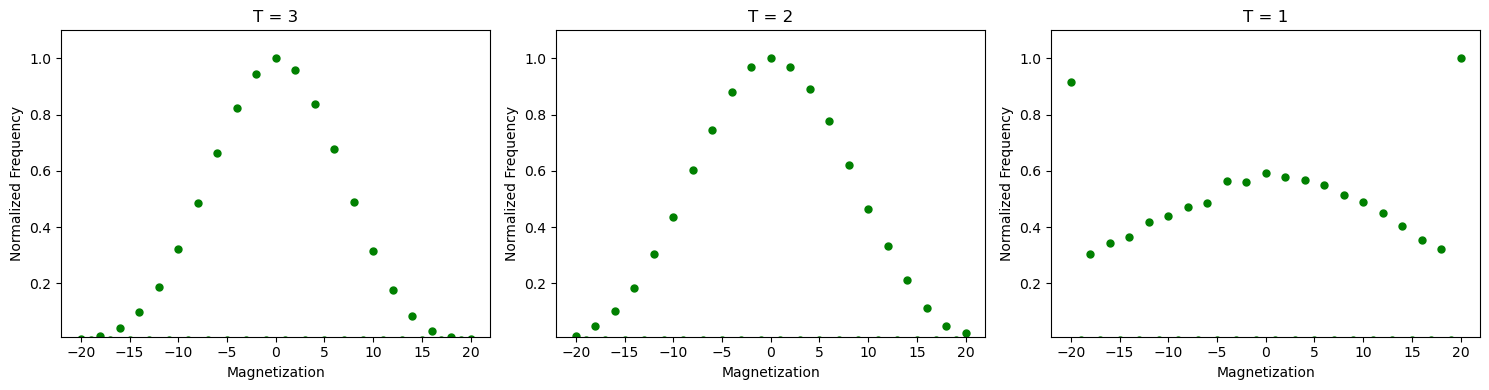

In [104]:
size = 20
T_val = [3, 2, 1]
iterations = 10000 * size
lattice, mag = initialize_1D(size)

fig = plt.figure(figsize=(15, 4))
gs = fig.add_gridspec(1, len(T_val))
for i, T in enumerate(T_val):
    mhist, final_lattice = simulate_1D(lattice, T, size, iterations)
    x_values, y_values = draw_histogram(mhist, size)
    ax = fig.add_subplot(gs[0, i])    
    ax.plot(x_values, y_values, 'g.', ms = 10)
    ax.set_ylim(0.01, 1.1)
    ax.set_xlabel("Magnetization")
    ax.set_ylabel("Normalized Frequency")
    ax.set_title(f'T = {T}')
plt.tight_layout()
plt.show()

# $$\textbf{Ising Model 3D} $$

Modify the Ising program to simulate a three-dimensional Ising model with a simple cubic lattice.                             
In whatever way you can, try to show that this system has a critical point at around T=4.5


In [18]:
def initialize_lattice(size):
    return np.random.choice([-1, 1], size=(size, size, size))

def deltaU(s, i, j, k, size):
    neighbors = [ s[(i-1) % size, j, k], s[(i+1) % size, j, k],
                  s[i, (j-1) % size, k], s[i, (j+1) % size, k],
                  s[i, j, (k-1) % size], s[i, j, (k+1) % size] ]
    Ediff = 2 * s[i, j, k] * sum(neighbors)
    return Ediff

def metropolis_update(s, T, size):
    for _ in range(size**3):  # Attempt flips for each spin
        i, j, k = np.random.randint(0, size, 3)
        Ediff = deltaU(s, i, j, k, size)
        if Ediff <= 0 or np.random.rand() < np.exp(-Ediff / T):
            s[i, j, k] *= -1  # Flip spin
    return s

def calculate_energy(s, size):
    energy = 0
    for i in range(size):
        for j in range(size):
            for k in range(size):
                neighbors = [s[(i+1) % size, j, k], s[i, (j+1) % size, k], s[i, j, (k+1) % size]]
                energy -= s[i, j, k] * sum(neighbors)
    return energy

def ising3D(size, T, iterations):
    s = initialize_lattice(size)
    energies = []
    for _ in range(iterations):
        s = metropolis_update(s, T, size)
        energy = calculate_energy(s, size)
        energies.append(energy)
    avg_energy = np.mean(energies)
    avg_energy_squared = np.mean([e**2 for e in energies])    
    heat_capacity = (avg_energy_squared - avg_energy**2) / (T**2 * size**3)
    return heat_capacity

def plot_heat_capacity(size, T_min, T_max, T_steps, iterations):
    temperatures = np.linspace(T_min, T_max, T_steps)
    heat_capacities = []
    for T in temperatures:
        heat_capacities.append(ising3D(size, T, iterations))
    return temperatures, heat_capacities

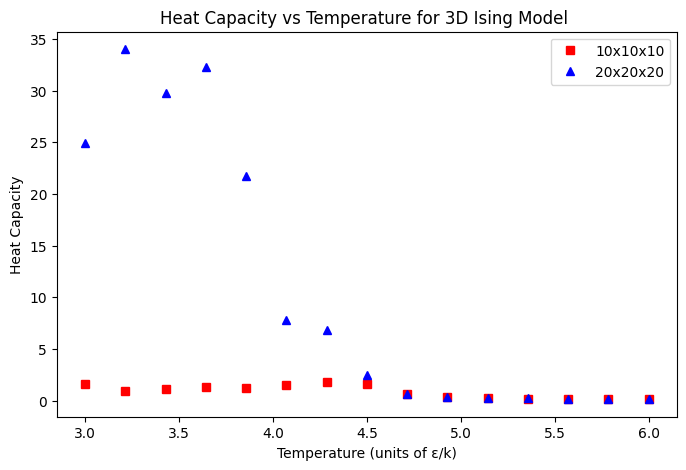

In [20]:
t1, h1 = plot_heat_capacity(size=10, T_min=3.0, T_max=6.0, T_steps=15, iterations=5000)
t2, h2 = plot_heat_capacity(size=20, T_min=3.0, T_max=6.0, T_steps=15, iterations=1000)
plt.figure(figsize=(8,5))
plt.plot(t1, h1, 'rs', label='10x10x10')
plt.plot(t2, h2, 'b^', label='20x20x20')
plt.legend()
plt.xlabel("Temperature (units of ε/k)")
plt.ylabel("Heat Capacity")
plt.title(f"Heat Capacity vs Temperature for 3D Ising Model ")
plt.show()

https://www.vaia.com/en-us/textbooks/physics/an-introduction-to-thermal-physics-1st/systems-of-interacting-particles/q-830-modify-the-ising-program-to-simulate-a-one-dimensional/